# Implementation of Naive Bayes Classifier

Importing necessary modules (Numpy for now)

In [88]:
import numpy as np

## Naive Bayes:

The Naive Bayes classifier utilizes Bayes' theorem, assuming conditional independence of features given the class label. It predicts the class label by calculating the posterior probability for each class and selecting the one with the highest probability. In mathematical terms, for class $y$ and features $X = \{x_1, x_2, \ldots, x_n\}$, the posterior probability $P(y | X)$ is expressed using Bayes' theorem without altering the formulas.

$$
P(y | X) = \frac{P(X | y) \cdot P(y)}{P(X)}
$$

The Naive Bayes classifier simplifies this by assuming feature independence, leading to:

$$
P(y | X) \propto P(y) \cdot \prod_{i=1}^{n} P(x_i | y)
$$

The training phase involves estimating the prior probabilities $P(y)$ and conditional probabilities $P(x_i | y)$ from the training data. Laplace smoothing is often applied to handle cases where certain feature values do not appear in the training set. During prediction, the model calculates the total log probability for each class and selects the class with the highest probability.

In [121]:
import numpy as np

class NaiveBayes:
    def __init__(self):
        self.class_probs = None
        self.feature_probs = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        self.class_probs = np.zeros(n_classes)
        for i, c in enumerate(self.classes):
            self.class_probs[i] = np.sum(y == c) / n_samples

        # feature probabilities given the class
        self.feature_probs = np.zeros((n_classes, n_features))
        for i, c in enumerate(self.classes):
            # Use Laplace smoothing to avoid zero probabilities
            class_samples = X[y == c]
            self.feature_probs[i] = (np.sum(class_samples, axis=0) + 1) / (len(class_samples) + 2)

    def predict(self, X):
        # the log likelihood for each class
        log_likelihood = np.log(self.feature_probs) @ X.T
        # adding the log prior probability of each class
        log_probabilities = np.log(self.class_probs.reshape(-1, 1)) + log_likelihood
        # return the class with the maximum log probability for each sample
        return self.classes[np.argmax(log_probabilities, axis=0)]

    def bayes_error_rate(self, y_true, y_pred):
        # calculate the mean of the boolean array where y_true equals y_pred, and subtract the mean from 1 to get the error rate
        return 1 - np.mean(y_true == y_pred)

    def recall(self, y_true, y_pred, target_class):
        # the number of true positives: instances where y_true and y_pred both equal target_class
        true_positive = np.sum((y_true == target_class) & (y_pred == target_class))
        # the number of actual positives: instances where y_true equals target_class
        actual_positive = np.sum(y_true == target_class)
        # recall: true positives divided by actual positives, if there are any actual positives
        return true_positive / actual_positive if actual_positive > 0 else 0

    def precision(self, y_true, y_pred, target_class):
        # the number of true positives: instances where y_true and y_pred both equal target_class
        true_positive = np.sum((y_true == target_class) & (y_pred == target_class))
        # the number of predicted positives: instances where y_pred equals target_class
        predicted_positive = np.sum(y_pred == target_class)
        # precision: true positives divided by predicted positives, if there are any predicted positives
        return true_positive / predicted_positive if predicted_positive > 0 else 0

    def accuracy(self, y_true, y_pred):
        # the number of correct predictions: instances where y_true equals y_pred
        correct_predictions = np.sum(y_true == y_pred)
        # the total number of samples
        total_samples = len(y_true)
        # accuracy: correct predictions divided by total samples, if there are any samples
        return correct_predictions / total_samples if total_samples > 0 else 0


## Breast Cancer Dataset

In [90]:
import pandas as pd

In [91]:
with open("Breast_Cancer_dataset.txt", "r") as f:
  bc_file_array = f.read().split("\n")

In [92]:
bc_file_array[0:5]

["'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'",
 "'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'",
 "'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'",
 "'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'",
 "'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'"]

## Pre-process the dataset

In [93]:
# Define attribute names
attributes = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
              'deg-malig', 'breast', 'breast-quad', 'irradiat', 'Class']

# Define categorical values for encoding
categorical_values = {
    'age': ['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'],
    'menopause': ['lt40','ge40','premeno'],
    'tumor-size': ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59'],
    'inv-nodes': ['0-2','3-5','6-8','9-11','12-14','15-17','18-20','21-23','24-26','27-29','30-32','33-35','36-39'],
    'node-caps': ['yes','no'],
    'deg-malig': ['1','2','3'],
    'breast': ['left','right'],
    'breast-quad': ['left_up','left_low','right_up','right_low','central'],
    'irradiat': ['yes','no'],
    'Class': ['no-recurrence-events','recurrence-events']
}

# Create an empty list to store DataFrames
dfs = []

# Process each line of the dataset
for line in bc_file_array:
    values = line.split(',')
    df = pd.DataFrame([dict(zip(attributes, values))])
    dfs.append(df)

# Concatenate the DataFrames
df = pd.concat(dfs, ignore_index=True)

In [94]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


### Handling missing (null) values by dropping their associated rows

In [95]:
df = df.replace('?', pd.NA)
df = df.dropna()
df = df.reset_index(drop=True)

In [96]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


## Encoding categorical features

- One-Hot Encoding:

For binary categorical features such as `node-caps`, `breast`, and `irradiat`, one-hot encoding is an appropriate method. This technique involves creating binary columns for each category.

- Ordinal Encoding:

Features like `age`, `menopause`, `tumor-size`, `inv-nodes`, and `deg-malig` exhibit a natural order. To represent these features numerically based on their order, ordinal encoding is a suitable approach.

- Label Encoding:

In the case of `breast-quad` and `Class`, which possesses more than two categories without a distinct ordinal relationship, label encoding can be used. This method assigns a unique integer to each category within the feature.

In [97]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Define features for each encoding method
one_hot_features = ['node-caps', 'breast', 'irradiat']
ordinal_features = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'deg-malig']
label_features = ['breast-quad', 'Class']

# One-Hot Encoding
df = pd.get_dummies(df, columns=one_hot_features)

# Ordinal Encoding
ordinal_encoder = OrdinalEncoder()
df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])

# Label Encoding
label_encoder = LabelEncoder()
for feature in label_features:
  df[feature] = label_encoder.fit_transform(df[feature])


In [98]:
df.head()

,age,menopause,tumor-size,inv-nodes,deg-malig,breast-quad,Class,node-caps_'no',node-caps_'yes',breast_'left',breast_'right',irradiat_'no',irradiat_'yes'
0,2.0,2.0,2.0,0.0,2.0,2,1,0,1,0,1,1,0
1,3.0,0.0,2.0,0.0,0.0,0,0,1,0,0,1,1,0
2,3.0,0.0,6.0,0.0,1.0,1,1,1,0,1,0,1,0
3,2.0,2.0,6.0,0.0,2.0,1,0,0,1,0,1,0,1
4,2.0,2.0,5.0,4.0,1.0,4,1,0,1,1,0,1,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              277 non-null    float64
 1   menopause        277 non-null    float64
 2   tumor-size       277 non-null    float64
 3   inv-nodes        277 non-null    float64
 4   deg-malig        277 non-null    float64
 5   breast-quad      277 non-null    int64  
 6   Class            277 non-null    int64  
 7   node-caps_'no'   277 non-null    uint8  
 8   node-caps_'yes'  277 non-null    uint8  
 9   breast_'left'    277 non-null    uint8  
 10  breast_'right'   277 non-null    uint8  
 11  irradiat_'no'    277 non-null    uint8  
 12  irradiat_'yes'   277 non-null    uint8  
dtypes: float64(5), int64(2), uint8(6)
memory usage: 16.9 KB


# Dataset to X and y

In [100]:
X = df.drop('Class', axis=1)
y = df['Class']

### Running the **Naive Bayes Classifier** on Breast Cancer Dataset:

In [112]:
nb = NaiveBayes()
nb.fit(X, y)
predictions = nb.predict(X.values)
accuracy = nb.accuracy(y, predictions)
print("- Naive Bayes")
print(f"Accuracy: {accuracy:.2f}")

error = nb.bayes_error_rate(y, predictions)
print(f"Bayes Error Rate: {error:.2f}")

recall = nb.recall(y, predictions, 1)
print(f"Recall: {recall:.2f}")

precision = nb.precision(y, predictions, 1)
print(f"Precision: {precision:.2f}")

- Naive Bayes
Accuracy: 0.65
Bayes Error Rate: 0.35
Recall: 0.72
Precision: 0.44


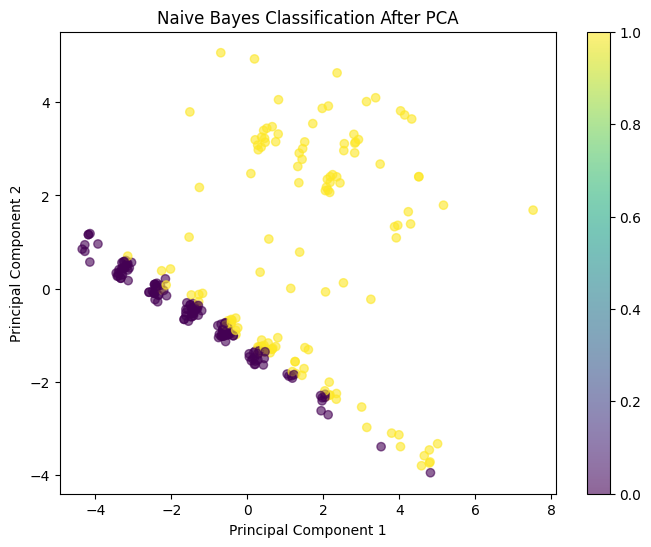

In [113]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)  # reduce to 2 components
X_pca = pca.fit_transform(X)

# Create a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predictions, cmap='viridis', alpha=0.6)

# Add a color bar
plt.colorbar(scatter)

plt.title('Naive Bayes Classification After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


--------------------------------------------------------------------------------

# Implementation of kMeans Algorithm

The k-Means clustering algorithm is a type of unsupervised learning used to classify unlabeled data into `k` clusters. The algorithm starts by randomly initializing `k` centroids. Each data point is then assigned to the nearest centroid using the Euclidean distance formula:

$$d(x, y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$$

where `x` and `y` are data points, and `n` is the number of dimensions.

In the next step, new centroids are calculated as the mean of all data points belonging to that cluster. This process of assigning data points to the nearest centroid and recalculating centroids is repeated until the centroids no longer change significantly or a maximum number of iterations is reached. The objective function of k-Means, which it tries to minimize, is the within-cluster sum of squares (WCSS):

$$WCSS = \sum_{i=1}^{k}\sum_{x \in C_i}||x - \mu_i||^2$$

where `C_i` is the `i`th cluster and `μ_i` is the centroid of `C_i`.

In [104]:
import numpy as np

def comb(n, k):
    return np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))

class KMeans:
    def __init__(self, n_clusters, max_iters=100, tol=0.0001):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = []

    def fit(self, X):
        # randomly initialize centroids
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = self.predict(X)
            # Update centroids based on the mean of assigned data points
            new_centroids = self.update_centroids(X, labels)
            # Check for convergence
            if np.linalg.norm(new_centroids - self.centroids) < self.tol:
                break

            self.centroids = new_centroids

    def predict(self, X):
        # Compute the Euclidean distance from each data point in X to each centroid
        distances = np.linalg.norm(X - self.centroids[:, np.newaxis, :], axis=2)
        # Return the index of the closest centroid for each data point
        return np.argmin(distances, axis=0)

    def update_centroids(self, X, labels):
        # Compute the new centroids as the mean of all data points assigned to each cluster
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])
        # Return the new centroids
        return new_centroids

    @staticmethod
    def adjusted_rand_score(labels_true, labels_pred):
        # Create a contingency matrix based on true and predicted labels
        contingency_matrix = np.histogram2d(labels_true, labels_pred)[0]
        # Calculate the sum over rows & columnns
        sum_over_rows = np.sum(contingency_matrix, axis=1)
        sum_over_cols = np.sum(contingency_matrix, axis=0)
        # Calculate the combinatorial of each
        nij = np.sum(contingency_matrix*(contingency_matrix-1)/2)
        ai = np.sum(sum_over_rows*(sum_over_rows-1)/2)
        bj = np.sum(sum_over_cols*(sum_over_cols-1)/2)
        # Compute the numerator and denominator
        tp_plus_fp = ai
        tp_plus_fn = bj
        tp = nij
        fp = tp_plus_fp - tp
        fn = tp_plus_fn - tp
        tn = comb(int(contingency_matrix.sum()), 2) - tp - fp - fn
        # Convert to integer types to avoid overflow or underflow
        tn, fp, fn, tp = int(tn), int(fp), int(fn), int(tp)
        # Empty data or full agreement
        if fn == 0 and fp == 0:
            return 1.0

        return 2.0 * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))

In [106]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X.values)
labels = kmeans.predict(X.values)

## Accuracy, Recall, Precision for kMeans?!
We CAN'T have these metrics for kMeans clustering algorithm, as the value of labels cannot be the same as those we have in our dataset. We assume that we don't have access to the true labels, so kMeans create values of labels randomly.

## What method to use to compare predicted labels and true labels?
Another method we can use here is Adjusted Rand Index. The Adjusted Rand Score (ARS) is a measure of the similarity between two data clusterings, adjusted for chance. It considers all pairs of samples and counts pairs that are assigned in the same or different clusters in the predicted and true clusterings. The ARS is then calculated using this formula:

$$
ARS = \frac{2 * (TP * TN - FN * FP)}{(TP + FN) * (FN + TN) + (TP + FP) * (FP + TN)}
$$

where:
- `TP` is the number of pair of points that are in the same cluster in both the true labels and the predicted labels.
- `TN` is the number of pair of points that are in different clusters in both the true labels and the predicted labels.
- `FP` is the number of pair of points that are in the same cluster in the true labels and in different clusters in the predicted labels.
- `FN` is the number of pair of points that are in different clusters in the true labels and in the same cluster in the predicted labels.

The score ranges from -1 for dissimilar clusterings to +1 for clusterings that are exactly the same, up to a permutation. A score of 0 indicates the clustering is no better than random. A negative score indicates that the clustering is worse than random.

In [109]:
ari_score = kmeans.adjusted_rand_score(y, labels)
print(f"Adjusted Rand Index (of kMeans): {ari_score}")

Adjusted Rand Index (of kMeans): 0.1668834895614795


In [108]:
ari_score = kmeans.adjusted_rand_score(y, predictions)
print(f"Adjusted Rand Index (of Naive Bayes): {ari_score}")

Adjusted Rand Index (of Naive Bayes): 0.09098526517874629


## Optional Plotting and Comparison Between Algorithms

Here, I used PCA to reduce the dimensionality of the input features to 2 components, and then plot the points and their associated class using colors to see the difference between them, and the true labels.

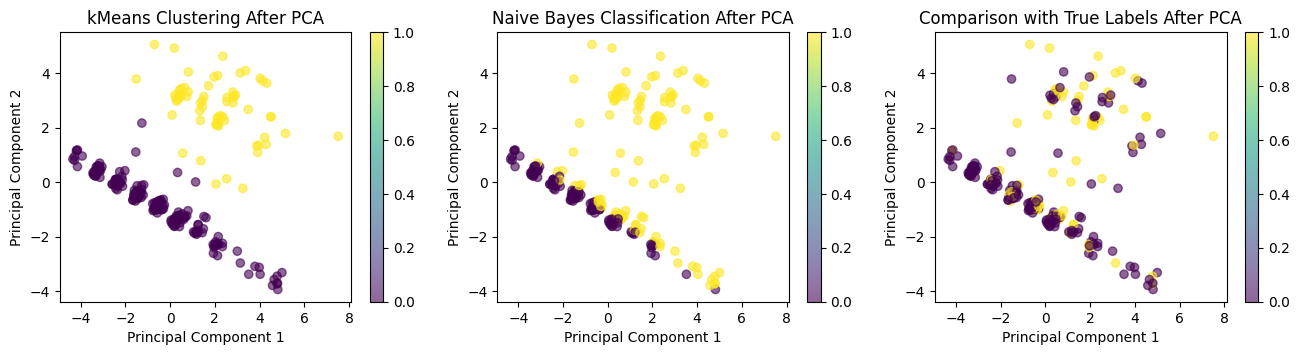

In [120]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig, axs = plt.subplots(1, 3, figsize=(16, 3.5))

# Plot for kMeans Clustering
scatter = axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
axs[0].set_title('kMeans Clustering After PCA')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
fig.colorbar(scatter, ax=axs[0])

# Plot for Naive Bayes Classification
scatter = axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=predictions, cmap='viridis', alpha=0.6)
axs[1].set_title('Naive Bayes Classification After PCA')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
fig.colorbar(scatter, ax=axs[1])


# Plot for Naive Bayes Classification
scatter = axs[2].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
axs[2].set_title('Comparison with True Labels After PCA')
axs[2].set_xlabel('Principal Component 1')
axs[2].set_ylabel('Principal Component 2')
fig.colorbar(scatter, ax=axs[2])

plt.show()

# Comparison between Naive Bayes and kMeans Clustering on Breast Cancer Dataset!

In [111]:
import pandas as pd
results = {
    'Model': ['Naive Bayes', 'kMeans Clustering'],
    'Accuracy': [0.65, "N/A"],
    'Recall': [0.75, "N/A"],
    'Precision': [0.44, "N/A"],
    'Error Rate': [0.35, "N/A"],
    'ARI': [0.090, 0.16],
}

df = pd.DataFrame(results)
df

,Model,Accuracy,Recall,Precision,Error Rate,ARI
0,Naive Bayes,0.65,0.75,0.44,0.35,0.09
1,kMeans Clustering,N/A,N/A,N/A,N/A,0.16


# When to use Naive Bayes and when to use kMeans?

 if you have labeled data and you’re interested in prediction, Naive Bayes could be a good choice. If you have unlabeled data and you’re interested in finding structure or groups within your data, kMeans could be a good choice. They have a different nature, Naive Bayes is a supervised method while kMeans is an unsupervised learning algorithm.